<a href="https://colab.research.google.com/github/dyaccu/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I


#🔧 Transformación

In [2]:
from pandas import json_normalize

df_normalizado = json_normalize(data)

df_normalizado.info()

df_normalizado.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [3]:
# Verifique si hay valores únicos en cada columna
for col in df_normalizado.columns:
  print(f"valores únicos en la columna'{col}': {df_normalizado[col].nunique()}")
  if df_normalizado [col].nunique() < 50: # Imprima los valores solamente si no hay muchos
   print(df_normalizado [col].unique())
   print('-' * 50) # Línea divisoria para mejor visualización


valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No'

In [4]:
# Verificando si hay duplicados
duplicados = df_normalizado.duplicated().sum()
print (f"Numero de lineas duplicadas: {duplicados}")


Numero de lineas duplicadas: 0


In [5]:
# Verificando se hay valores Nulos
valores_nulos = df_normalizado.isnull().values.sum()
print("\nValores nulos por columna:")
print(valores_nulos [valores_nulos > 0])


Valores nulos por columna:
[]


In [6]:
valores_en_blanco_o_vacio = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores en blanco o string vacios por columna: ")
print(valores_en_blanco_o_vacio[valores_en_blanco_o_vacio > 0])


Valores en blanco o string vacios por columna: 
Churn                    224
account.Charges.Total     11
dtype: int64


In [7]:
#Cambiando la columna "account.Charges.Total" a Float
df_normalizado['account.Charges.Total'] = pd.to_numeric (df_normalizado['account.Charges.Total'], errors='coerce')
print (df_normalizado['account.Charges.Total'].dtype)

float64


In [8]:
# Eliminando las columnas de Churn
df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len (df_normalizado))

Número de filas después de eliminar las vacías en 'Churn': 7043


In [9]:
# Vacíos o en blanco
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [10]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

#📊 Carga y análisis

In [11]:
# Descripción general de columnas numéricas
df_normalizado.describe()


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df_normalizado['Cuentas_Diarias'] = df_normalizado['account.Charges.Monthly'] / 30
print(df_normalizado[['account.Charges.Monthly', 'Cuentas_Diarias']])

      account.Charges.Monthly  Cuentas_Diarias
0                       65.60         2.186667
1                       59.90         1.996667
2                       73.90         2.463333
3                       98.00         3.266667
4                       83.90         2.796667
...                       ...              ...
7262                    55.15         1.838333
7263                    85.10         2.836667
7264                    50.30         1.676667
7265                    67.85         2.261667
7266                    59.00         1.966667

[7043 rows x 2 columns]


In [13]:
df_normalizado.to_csv("df_normalizado_limpio.csv", index=False)

In [14]:
import plotly.express as px

px.histogram (df_normalizado, x = 'customer.gender', text_auto = True, color = 'Churn', barmode = 'group')


In [15]:
px.histogram (df_normalizado, x = 'customer.SeniorCitizen', text_auto = True, color = 'Churn', barmode = 'group')


In [16]:
px.histogram (df_normalizado, x = 'customer.tenure', text_auto = True, color = 'Churn', barmode = 'group')


In [17]:
# Agrupar por tenure y Churn
df_grouped = df_normalizado.groupby(['customer.tenure', 'Churn']).size().unstack (fill_value=0)

In [18]:
# Calcular el % de churn por tenure
df_grouped['churn_rate'] = (df_grouped.get('Yes', 0) / df_grouped.sum (axis=1)) * 100

In [19]:
# Mostrar el resultado
print (df_grouped[['churn_rate']])

Churn            churn_rate
customer.tenure            
0                  0.000000
1                 61.990212
2                 51.680672
3                 47.000000
4                 47.159091
...                     ...
68                 9.000000
69                 8.421053
70                 9.243697
71                 3.529412
72                 1.657459

[73 rows x 1 columns]


In [20]:
fig = px.line(df_grouped.reset_index(),
              x='customer.tenure',
              y='churn_rate',
              markers=True,
              title='Tasa de Churn (%) por Tenure')
fig.show()

In [21]:
px.scatter(df_normalizado,
            x="customer.tenure",
            y="account.Charges.Monthly",
            color="Churn",
            title="Tenure vs Cargos mensuales por Churn")

In [22]:
px.histogram (df_normalizado, x = 'account.Contract', text_auto= True, color = 'Churn', barmode = 'group')

In [23]:
px.box(df_normalizado, x = 'Churn', y = 'account.Charges.Monthly', color = 'Churn')

In [24]:
px.histogram(df_normalizado, x = 'phone.PhoneService', text_auto= True, color = 'Churn', barmode = 'group')

In [25]:
px.histogram(df_normalizado, x = 'internet.InternetService', text_auto= True, color = 'Churn', barmode = 'group')

In [26]:
px.histogram(df_normalizado, x = 'internet.StreamingTV', text_auto= True, color = 'Churn', barmode = 'group')

In [27]:
px.histogram(df_normalizado, x = 'account.PaymentMethod', text_auto= True, color = 'Churn', barmode = 'group')

#📊 Informe Final – Análisis de Evasión de Clientes (Churn) – Telecom X

## 🔹 Introducción

En este análisis abordamos el problema de **evasión de clientes (churn)** en la empresa de telecomunicaciones **Telecom X**. La alta rotación de clientes representa una amenaza significativa para la sostenibilidad y el crecimiento de la empresa. El objetivo de este estudio es identificar los factores que más contribuyen a la pérdida de clientes, a partir de un análisis exploratorio y visual de los datos, con el fin de proponer estrategias que mejoren la retención.

---

## 🔹 Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos:

- **Importación** de datos desde un archivo JSON alojado en GitHub.
- **Normalización** de estructuras anidadas mediante `json_normalize`.
- Eliminación de registros con campos vacíos o inconsistencias:
  - Se eliminaron 224 registros con el campo `Churn` vacío.
  - Conversión de la columna `account.Charges.Total` a tipo float.
- Verificación:
  - Sin valores nulos luego del tratamiento.
  - Sin registros duplicados.
- Se creó una columna adicional `Cuentas_Diarias` dividiendo los cargos mensuales por 30.

---

## 🔹 Análisis Exploratorio de Datos

Mediante histogramas, gráficos de dispersión y boxplots, se identificaron patrones significativos:

- **Género y churn**: No se observaron diferencias relevantes entre hombres y mujeres.
- **Adultos mayores (SeniorCitizen)**: Mayor tasa de churn en comparación con los no adultos mayores.
- **Tenure (antigüedad del cliente)**:
  - La tasa de churn es muy alta en los primeros meses y disminuye a medida que aumenta la permanencia del cliente.
- **Tipo de contrato**:
  - Los contratos mensuales presentan la mayor tasa de abandono.
  - Los contratos de 1 o 2 años tienen tasas de churn considerablemente menores.
- **Cargos mensuales**:
  - Los clientes con cargos mensuales más altos presentan una mayor propensión a abandonar.
- **Servicios de Internet**:
  - Usuarios con servicio de fibra óptica tienen mayor churn que aquellos con DSL o sin internet.
  - La presencia de servicios como soporte técnico o streaming también influye en el comportamiento del cliente.

---

## 🔹 Conclusiones e Insights

- La **antigüedad del cliente (tenure)** es el mejor predictor de churn: los primeros meses son críticos para la retención.
- Los **contratos mensuales** están altamente asociados con la evasión.
- Clientes con **cargos mensuales altos** o **sin servicios complementarios** (soporte técnico, streaming) tienen mayor riesgo de abandono.
- Los **adultos mayores** presentan mayor churn, lo que podría vincularse a una experiencia de usuario deficiente o falta de soporte adecuado.

---

## 🔹 Recomendaciones

1. **Fomentar contratos a largo plazo** mediante descuentos o programas de fidelización.
2. **Implementar estrategias de onboarding y seguimiento personalizado** en los primeros 6 meses.
3. **Brindar atención especializada a adultos mayores**, con soporte personalizado y simplificado.
4. **Aumentar el valor percibido** de los servicios adicionales mediante bundles y promociones.
5. **Lanzar campañas específicas para clientes con cargos elevados**, ofreciéndoles planes personalizados.



## 🌟 Extra: Análisis de Correlación

Se realizó un análisis de correlación entre variables numéricas del dataset, incorporando:

- La variable `Churn_bin` (1 para clientes que se fueron, 0 para los que permanecen).
- La variable `Servicios_Totales`, que representa la cantidad de servicios digitales contratados por cada cliente.

La matriz de correlación fue visualizada mediante un heatmap

### Principales hallazgos:

🔹 **`customer.tenure` y `Churn_bin`**:
- Correlación **negativa moderada** de **-0.35**.
- Indica que los clientes con mayor antigüedad tienen menor probabilidad de churn.

🔹 **`Cuentas_Diarias` y `Churn_bin`**:
- Correlación **positiva débil** (**0.19**), lo cual sugiere que clientes con cargos diarios más altos pueden tener levemente más tendencia a abandonar el servicio.

🔹 **`Servicios_Totales` y `Churn_bin`**:
- Correlación **ligeramente negativa** de **-0.09**.
- Sugiere que, si bien la relación es débil, los clientes con más servicios contratados tienden a permanecer más.

🔹 **`account.Charges.Total` y `Servicios_Totales`**:
- Correlación **alta** (**0.75**), lo cual es lógico: más servicios contratados → mayor gasto acumulado.

---

### Interpretación:

- El **tenure** sigue siendo el predictor más fuerte en este análisis numérico.
- Las variables financieras (`Cuentas_Diarias`, `Charges.Monthly`) tienen cierta relación con el churn, pero no tan significativa por sí solas.
- La cantidad de servicios contratados no tiene un impacto lineal fuerte sobre la evasión, pero sí aporta al contexto general de fidelización.

---

> 🔚 Este análisis adicional refuerza los insights previos sobre la importancia de la fidelización temprana y el ofrecimiento de servicios complementarios. También aporta variables clave que pueden ser usadas en futuros modelos predictivos de churn.


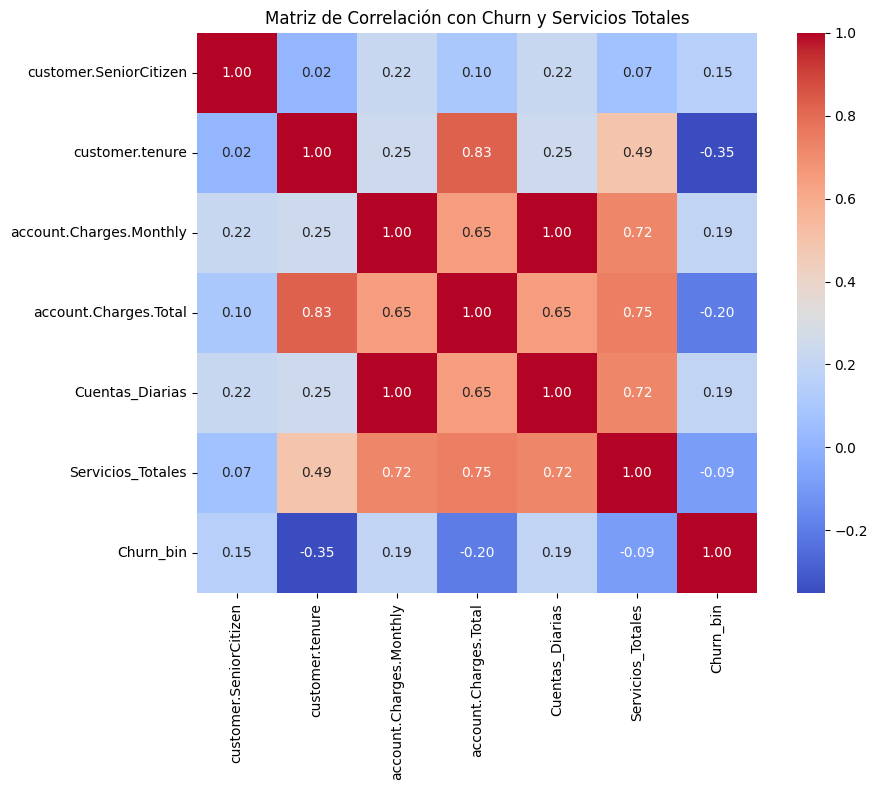

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Convertir 'Churn' en variable binaria
df_normalizado['Churn_bin'] = df_normalizado['Churn'].map({'Yes': 1, 'No': 0})

# 2. Crear variable 'Servicios_Totales'
servicios = ['internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
             'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']

for servicio in servicios:
    df_normalizado[servicio + '_bin'] = df_normalizado[servicio].apply(lambda x: 1 if x == 'Yes' else 0)

df_normalizado['Servicios_Totales'] = df_normalizado[[s + '_bin' for s in servicios]].sum(axis=1)

# 3. Calcular matriz de correlación
variables_corr = ['customer.SeniorCitizen', 'customer.tenure',
                  'account.Charges.Monthly', 'account.Charges.Total',
                  'Cuentas_Diarias', 'Servicios_Totales', 'Churn_bin']

correlation_matrix = df_normalizado[variables_corr].corr()

# 4. Visualizar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación con Churn y Servicios Totales")
plt.tight_layout()
plt.show()
